In [1]:
import pandas as pd
import yfinance as yf


In [4]:
# get data 
start_date = "2021-08-01"  
end_date = "2023-08-01"  
data = yf.download('^GSPC', start=start_date, end=end_date)
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-02,4406.859863,4422.180176,4384.810059,4387.160156,4387.160156,3724090000
2021-08-03,4392.740234,4423.790039,4373.000000,4423.149902,4423.149902,3965190000
2021-08-04,4415.950195,4416.169922,4400.229980,4402.660156,4402.660156,4260760000
2021-08-05,4408.859863,4429.759766,4408.859863,4429.100098,4429.100098,3769410000
2021-08-06,4429.069824,4440.819824,4429.069824,4436.520020,4436.520020,3451870000
...,...,...,...,...,...,...
2023-07-25,4555.189941,4580.620117,4552.419922,4567.459961,4567.459961,3812470000
2023-07-26,4558.959961,4582.470215,4547.580078,4566.750000,4566.750000,3990290000
2023-07-27,4598.259766,4607.069824,4528.560059,4537.410156,4537.410156,4553210000


In [10]:
symbols = ["AAPL", "AMZN", "GOOG", "META", "MSFT", "NVDA", "TSLA"]
market_symbol = '^GSPC'  # S&P 500 index symbol
stock_data = yf.download(symbols, start=start_date, end=end_date)
print(stock_data)


[*********************100%***********************]  7 of 7 completed


1 Failed download:
['MSFT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-08-01 -> 2023-08-01)')



             Adj Close                                                       \
                  AAPL        AMZN        GOOG        META MSFT        NVDA   
Date                                                                          
2021-08-02  143.640503  166.574005  135.989502  351.950012  NaN  197.202652   
2021-08-03  145.456726  168.311996  136.279999  351.239990  NaN  197.851669   
2021-08-04  145.052017  167.735992  136.028503  358.920013  NaN  202.434753   
2021-08-05  145.160629  168.799500  136.940002  362.970001  NaN  206.059280   
2021-08-06  144.468628  167.246994  137.035995  363.510010  NaN  203.353394   
...                ...         ...         ...         ...  ...         ...   
2023-07-25  193.358887  129.130005  122.790001  294.470001  NaN  456.790009   
2023-07-26  194.237701  128.149994  129.660004  298.570007  NaN  454.519989   
2023-07-27  192.959427  128.250000  129.869995  311.709991  NaN  459.000000   
2023-07-28  195.565918  132.210007  133.009995  325

In [14]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
# Dictionary to store beta values for each symbol
beta_values = {}

# Fetch historical price data for each symbol and the S&P 500 index
for symbol in symbols:
    stock_data = yf.download(symbol, start=start_date, end=end_date)['Adj Close']
    market_data = yf.download(market_symbol, start=start_date, end=end_date)['Adj Close']

    stock_df = pd.DataFrame(stock_data)
    market_df = pd.DataFrame(market_data)

    stock_returns = stock_df.pct_change().dropna()
    market_returns = market_df.pct_change().dropna()

    covariance = stock_returns['Adj Close'].cov(market_returns['Adj Close'])
    market_variance = market_returns['Adj Close'].var()

    beta = covariance / market_variance
    beta_values[symbol] = beta

# Print the beta values
print("Beta Values:")
for symbol, beta in beta_values.items():
    print(f"{symbol}: {beta}")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Beta Values:
AAPL: 1.2780713558337

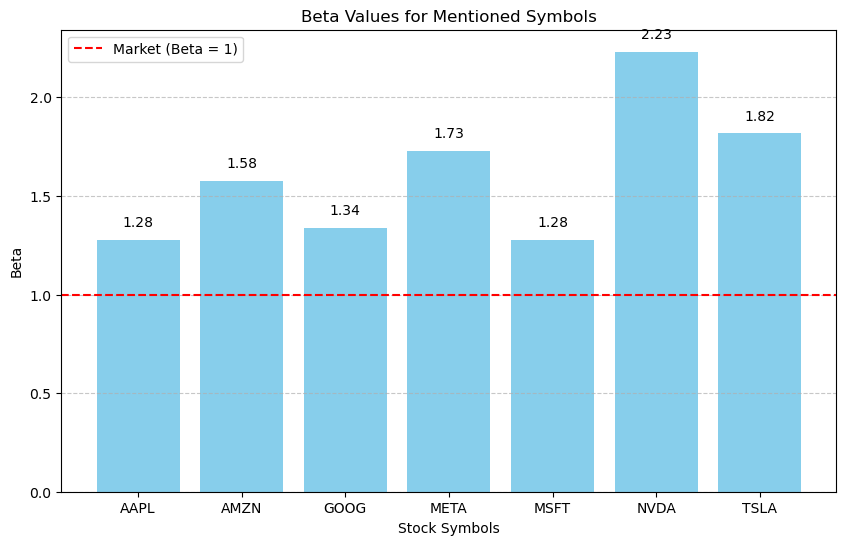

In [15]:
# Visualization
plt.figure(figsize=(10, 6))
plt.bar(beta_values.keys(),beta_values.values(), color='skyblue')
plt.axhline(y=1, color='r', linestyle='--', label='Market (Beta = 1)')
plt.title('Beta Values for Mentioned Symbols')
plt.xlabel('Stock Symbols')
plt.ylabel('Beta')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
for symbol, beta in beta_values.items():
    plt.text(symbol, beta + 0.05, f'{beta:.2f}', ha='center', va='bottom', fontsize=10)

plt.show()
